# VISION 2020: an SAT data analysis

### Problem Statement

A new format for the SAT was released in March 2016. The College Board - the organization that administers the SAT - seeks reccomendations on where money is best spent to improve SAT participation rates. Using data from 2017-18 SAT and ACT datasets I propose a two pronged approach for increasing participation by capitlizing on the existing participation trends and using data to dispell negative press.

#####  Project of Andrew Artz

This project was completed in cooperation with General Assembly in June of 2019.

-------


### Executive Summary

The methodlogy used for this project began with an inventory of all tools and datasets available.  Four datasets were identified as well as the websites of the College Board and ACT Inc.  The work of several thought-leaders in higher education were also bookmarked. Jupyter notebook was used to clean and document the data analysis of four .CSV files before merging them into one final workbook.  The notebook was then supplemented with addition demographic data from the US Census Bureau's 5 Year American Community Survey.  Visualizations were generated in Tableau and using Seaborn.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)





The following libraries were used for this project: Numpy, Pandas, MatPlot, Seaborn, and Scipy

In [1]:
# numpy, or Numerical Python, is a library for mathematical and logical operations.  
# Using the `as` command we identify its shorthand abbreviation "np". 
# We may now use `np` in the future to call numpy without typing its whole name.
import numpy as np

# pandas, or python Data Analysis Library, is a library for using python to analyze data stored as an arrary.
import pandas as pd

# "matplotlib.pyplot" is a library for using python to visualize data
import matplotlib.pyplot as plt

# seaborn is another libary for using python to visualize data
import seaborn as sns

import scipy.stats as stats

# keeps viz inline
%matplotlib inline

## 2017 Data Import and Cleaning

The first step in the analysis was to import the provided datasets and prepare them for analysis.  Two datasets were provided, `sat_2017.csv` and `act_2017.csv`.  Both were imported and assigned to pandas dataframes.

In [2]:
act2017 = pd.read_csv("../data/act_2017.csv")

In [3]:
sat2017 = pd.read_csv("../data/sat_2017.csv")

Samples from both data frames were inspected for completeness and to facilitate a baseline understanding of what was contained in each .csv file.  

In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


As both dataframes appeared to be in basic order several descriptive commands were run over the data to examine the datatypes and look for missing values.

##### ACT 2017:

In [6]:
# `.dtypes` attribute provides you the data type for each of the columns in the data frame.
# The data frame is *everything* you are working with in Pandas.
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

`.shape` provides you with the total number of rows and columns, minus the header row and index column.

act2017.shape

`.isnull` provides you with a printout of whether any data is missing from the data frame.  The method `.sum()` provides the total number of cells within the dataframe that are empty. Using this method is much more efficient

In [7]:
act2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

There are no null values, but if there were the `.mean()` method would provide the percentage of the total column with a null. 


In [8]:
act2017.isnull().mean()

State            0.0
Participation    0.0
English          0.0
Math             0.0
Reading          0.0
Science          0.0
Composite        0.0
dtype: float64

`.describe()` provides descriptive statsistics for each of the columns in the data frame, so long as every object is a numerical value (either and int or float).  If any value is nonumeric (string, etc) the method will not return an output

In [9]:
act2017.describe()


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In this case we may observe that although "participation" and "composite" contain numerical values, they have not been input as either int or float.  

##### SAT 2017:

In [10]:
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
sat2017.shape

(51, 5)

In [12]:
sat2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [13]:
sat2017.describe()
# particiaption % is not shown

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


**Preliminary evaluation of the data**

*ACT 2017:*

This data frame contains what appears to be ACT scores for scores for all 50 states, the District of Columbia, and a national observation.  The data frame was loaded from a provided .CSV file and appears to have loaded correctly.  The percentage of the statewide participation is provided, along with the statewide average of English, Math, Reading, and Science scores. A Composite Score calculated as the mean of each of the four previous scores.  Within the 52 rows and 7 columns there are string and float data types.  There are no missing values, but there does appear to minor errors in the data and issues with data formatting that should be resolved prior to data analysis. The state of Maryland has a questionably low average Science score. All column names are single words in title case, a percentage symbol is used in "Participation%".    

*SAT 2017:*

This data frame contains what appears to be SAT scores for scores for all 50 states and the District of Columbia.  The data frame was loaded from a provided .CSV file and appears to have loaded correctly.  The percentage of statewide participation is included, along with the statewide average of evidence-based reading and writing, math, and a total score.  Within the 51 rows and 5 columns there are there are string and float data types.  There are no missing values, but there does appear to minor errors in the data and issues with data formatting that should be resolved prior to data analysis.  The state of Maryland has a questionably low average Math score.  Column names may contain multiple words and symbols such as percentage symbols and hyphens. All column names are in title case.   

*Comparrision:*

Both data frames appear to be mostly complete with minor errors. Both data frames contain information on statewide participation. Neither data frame contains missing values. Within these data frames there are many similarities.  This makes sense given the nature of the information they contain.  Even so, there are several key differences that may affect the types of analysis that may be completed. Most notably, where the ACT contains a composite score, calculated as the mean of four subject areas, the SAT contains a total score which is the sum of only two subject areas. Unlike the ACT, the SAT data frame does not include a national average.  *If documentation were found to confirm the process of how such scores were calculated*, a national score may be produced for the SAT as well.  

*Conclusion:* 

Both data sets contain information on standardized tests used for undergraduate college admissions.  There does not appear to be any missing data in either of the 2017 data frames. The data appears to be compelte with minor errors that will need to be corrected before further edits may take place.  A possible use for such a datset may be to provide the College Board with business intellengence and analytics that may increase national SAT participation.  



**Answers to project one, section four questions**


>There does not appear to be any missing data in either of the 2017 data frames. 
>
> In both data frames, Maryland has incorrect values.
>
> There is an error in the naming of the District of Columbia.
>
> Paricipation is a string data type as it contains nonnumerical values.
>

#### 6. Fix Incorrect Data Types

In [14]:
# lambda functions are throwaway functions that are not stored for further use
act2017['Participation'] = act2017['Participation'].map(lambda p_cell: p_cell.rstrip('%'))
#(8)                       (1)                     (2)  (3)    (4)  (5)      (6)     (7)

# (1) Identifies the 'Participation' column (a series within the "act2017" dataframe) as the target of the following code
# (2) .map() a method that temporarily converts the selected objects to a list so that they may be maniplulated through further iterations
# (3) lambda is a function that may apply one or more arguments to a single value (like the iteratble we made with the `.map()` method!!)
# (4) A temporary identifier of the object we have mapped and chosen to work on using lambda.
# (5) For the temporary identifier, do the things to the right
# (6) A method that removes *something* from the right (the tail) of a variable
# (7) This argument is the *something* that we are looking to remove, the percent symbol!
# (8) Make the new value of 'Particiaption' equal to the results of the code we just ran!

# `.rstrip()` was found on this page: https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column

In [15]:
# check the work
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [16]:
# The `.rstrip()` only works on strings, but now that the percentage symbol is removed we may convert it to an int.
act2017['Participation'] = act2017['Participation'].map(lambda p_cell: int(p_cell)) 

In [17]:
# Check the work
act2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [18]:
# convert particiaption to a decimal
act2017['Participation'] = act2017['Participation'].map(lambda p_cell: (p_cell * .01)) 

In [19]:
# check the work
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [20]:
sat2017['Participation'] = sat2017['Participation'].map(lambda p_cell: p_cell.rstrip('%'))
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [21]:
sat2017['Participation'] = sat2017['Participation'].map(lambda p_cell: int(p_cell)) 

In [22]:
sat2017['Participation'] = sat2017['Participation'].map(lambda p_cell: (p_cell * .01)) 

- Fix any individual values preventing other columns from being the appropriate type.

In [23]:
act2017['Composite'] = act2017['Composite'].map(lambda c_cell: c_cell.rstrip('x'))

In [24]:
act2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


In [25]:
act2017['Composite'] = act2017['Composite'].map(lambda c_cell: float(c_cell)) 

In [26]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [27]:
act2017.loc[act2017["State"] == "Maryland"]["Science"] = 23.8

/Users/andrewartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
act2017.iloc[21:22,5:6] = 23.8

In [29]:
act2017.iloc[21:22,5:6] 

,Science
21,23.8


##### SAT 2017:

In [30]:
sat2017.iloc[20:21,3:4]

,Math
20,52


In [31]:
sat2017.iloc[20:21,3:4] = 524

In [32]:
sat2017.iloc[20:21,3:4]

,Math
20,524


- Display the data types again to confirm they are correct.

In [33]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [34]:
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [35]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [36]:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 7. Rename Columns

In [37]:
sat2017.columns = map(str.lower, sat2017.columns)

In [38]:
act2017.columns = map(str.lower, act2017.columns)

In [39]:
act2017.rename(columns = {'participation' : 'a17_participation', 'english':'a17_english', 'math':'a17_math' , 'reading' : 'a17_reading', 'science' : 'a17_science', 'composite' : 'a17_composite'}, inplace = True)

In [40]:
sat2017.rename(columns = {'participation' : 's17_participation','evidence-based reading and writing' : 's17_reading_writing','math' : 's17_math', 'total': 's17_total'}, inplace = True)

In [41]:
sat2017.head()

,state,s17_participation,s17_reading_writing,s17_math,s17_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [42]:
act2017.head()

,state,a17_participation,a17_english,a17_math,a17_reading,a17_science,a17_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|All datasets|States were used as the key to merge all datasets in this project|
|**a17_participation**|*float*|ACT 2017|Percent participation in the 2017 ACT|
|**a17_english**|*float*|ACT 2017|Subject area scores for the 2017 ACT|
|**a17_math**|*float*|ACT 2017|Subject area scores for the 2017 ACT|
|**a17_reading**|*float*|ACT 2017|Subject area scores for the 2017 ACT|
|**a17_science**|*float*|ACT 2017|Subject area scores for the 2017 ACT|
|**a17_composite**|*float*|ACT 2017|The composite score provided as the mean of each subject area scores for the 2017 ACT|
|**a18_participation**|*float*|ACT 2018|Percent participation in the 2018 ACT|
|**a18_english**|*float*|ACT 2018|Subject area scores for the 2018 ACT|
|**a18_math**|*float*|ACT 2018|Subject area scores for the 2018 ACT|
|**a18_reading**|*float*|ACT 2018|Subject area scores for the 2018 ACT|
|**a18_science**|*float*|ACT 2018|Subject area scores for the 2018 ACT|
|**a18_composite**|*float*|ACT 2018|The composite score provided as the mean of each subject area scores for the 2018 ACT|
|**s17_participation**|*float*|SAT 2017|Percent participation in the 2017 SAT|
|**s17_reading_writing**|*integer*|SAT 2017|Subject area scores for the 2017 SAT|
|**s17_math**|*integer*|SAT 2017|Subject area scores for the 2017 SAT|
|**s17_total**|*integer*|SAT 2017|The sum total score of the math and evidence based reading and writing subject area scores for the 2017 SAT|
|**s18_participation**|*float*|SAT 2018|Percent participation in the 2018 SAT|
|**s18_reading_writing**|*integer*|SAT 2018|Subject area scores for the 2017 SAT|
|**s18_math**|*integer*|SAT 2018|Subject area scores for the 2018 SAT|
|**s18_total**|*integer*|SAT 2018|The sum total score of the math and evidence based reading and writing subject area scores for the 2018 SAT|


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Region**|*string*|US Census Bureau|Major Census Regions of the United States|
|**Division**|*string*|US Census Bureau|Subdivisions of the Major Census Regions in the United States|
|**tot_est_pop_15_to_17**|*integer*|2017 American Community Survey, 5-Year Estimates|Total estimated population for students ages 15-17|
|**tot_est_pop_15_to_17_enrolled_in_school**|*integer*|2017 American Community Survey, 5-Year Estimates|Estimated Total of the population ages 15-17 enrolled in school|
|**public_school_est_pop_15_to_17_enrolled_in_school**|*integer*|2017 American Community Survey, 5-Year Estimates|Estimated Total of the population ages 15-17 enrolled in Public Schools|
|**percent_est_pop_15_to_17_enrolled_in_school**|*float*|2017 American Community Survey, 5-Year Estimates|Estimated Percent of the population ages 15-17 enrolled in school|
|**public_school_est_pop_15_to_17_enrolled_in_school**|*integer*|2017 American Community Survey, 5-Year Estimates|Total estimated population for students ages 15-17 enrolled in schools|
|**private_school_est_pop_15_to_17_enrolled_in_school**|*integer*|2017 American Community Survey, 5-Year Estimates|Estimated Percent of the population ages 15-17 enrolled in Private School|

#### 9. Drop unnecessary rows

In [43]:
# sat2017 = sat2017.iloc[1:,]

In [44]:
act2017 = act2017.iloc[1:,]

In [45]:
act2017.head()

,state,a17_participation,a17_english,a17_math,a17_reading,a17_science,a17_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [46]:
sat2017.head()

,state,s17_participation,s17_reading_writing,s17_math,s17_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 10. Merge Dataframes

In [47]:
tests2017 = pd.merge(act2017, sat2017, how = "right", on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [48]:
combined_2017 = tests2017

In [49]:
combined_2017.to_csv('../data/combined_2017.csv')  

## 2018 Data Import and Cleaning

Following the examination and cleaning of the 2017 ACT and SAT datasets, the 2018 datasets were imported and reviewed in the same manner.  

In [50]:
act2018 = pd.read_csv("../data/ACT2018_Testing_Data.csv")

In [51]:
sat2018 = pd.read_csv("../data/SAT2018_Testing _Data.csv")

##### ACT 2018:

In [52]:
act2018.shape

(54, 3)

In [53]:
act2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [54]:
act2018.isnull().sum()

State            2
Participation    2
Composite        2
dtype: int64

In [55]:
act2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [56]:
act2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


>
> Remove two empty, extra rows at the end of the data frame
>
> Maine is duplicated
>
> Participation percentage
>

In [57]:
act2018.drop_duplicates(inplace=True)

# http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html

In [58]:
act2018 = act2018.iloc[:51,]

In [59]:
act2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [60]:
act2018['Participation'] = act2018['Participation'].map(lambda p_cell: p_cell.rstrip('%'))

In [61]:
act2018['Participation'] = act2018['Participation'].map(lambda p_cell: int(p_cell)) 

In [62]:
act2018['Participation'] = act2018['Participation'].map(lambda p_cell: (p_cell * .01)) 

In [63]:
act2018.rename(columns = {'State' : 'state', 'Participation':'a18_participation', 'Composite':'a18_composite'}, inplace = True)

##### SAT 2018:

In [64]:
sat2018.dtypes

State                                  object
Participation                          object
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
Unnamed: 5                            float64
Unnamed: 6                            float64
Unnamed: 7                            float64
dtype: object

In [65]:
sat2018.shape

(52, 8)

In [66]:
sat2018.dtypes

State                                  object
Participation                          object
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
Unnamed: 5                            float64
Unnamed: 6                            float64
Unnamed: 7                            float64
dtype: object

In [67]:
sat2018.describe()

,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,51.000000,51.000000,51.000000,0.0,0.0,0.0
mean,563.686275,556.235294,1120.019608,NaN,NaN,NaN
std,47.502627,47.772623,94.155083,NaN,NaN,NaN
min,480.000000,480.000000,977.000000,NaN,NaN,NaN
25%,534.500000,522.500000,1057.500000,NaN,NaN,NaN
50%,552.000000,544.000000,1098.000000,NaN,NaN,NaN
75%,610.500000,593.500000,1204.000000,NaN,NaN,NaN
max,643.000000,655.000000,1298.000000,NaN,NaN,NaN


In [68]:
sat2018.isnull().sum()

State                                  1
Participation                          1
Evidence-Based Reading and Writing     1
Math                                   1
Total                                  1
Unnamed: 5                            52
Unnamed: 6                            52
Unnamed: 7                            52
dtype: int64

> 
> Remove extra, empty row at the end of the df
>
> Remove three extra, empty columns to the right of this df
> 
> Participation percentage
>




In [69]:
sat2018 = sat2018.drop(["Unnamed: 5", "Unnamed: 6", "Unnamed: 7"], axis=1)

In [70]:
sat2018 = sat2018.iloc[:51,]

In [71]:
sat2018.rename(columns = {'State': 'state','Participation' : 's18_participation', 'Evidence-Based Reading and Writing':'s18_reading_writing', 'Math':'s18_math', 'Total':'s18_total'}, inplace = True)

In [72]:
sat2018['s18_reading_writing'] = sat2018['s18_reading_writing'].map(lambda c_cell: int(c_cell))

In [73]:
sat2018['s18_math'] = sat2018['s18_math'].map(lambda c_cell: int(c_cell))

In [74]:
sat2018['s18_total'] = sat2018['s18_total'].map(lambda c_cell: int(c_cell))

In [75]:
sat2018['s18_participation'] = sat2018['s18_participation'].map(lambda p_cell: p_cell.rstrip('%'))
sat2018['s18_participation'] = sat2018['s18_participation'].map(lambda p_cell: int(p_cell)) 
sat2018['s18_participation'] = sat2018['s18_participation'].map(lambda p_cell: (p_cell * .01)) 

Following the cleaning of the 2018 datasets, the composite 2018 and 2017 .csv files were merged into a final dataset.  The datasets were joined using the `states` as the key.

In [76]:
act2018.loc[8,'state'] = ('District of Columbia')
# non-int based index using row 8 and the column 'state' to change the string


In [77]:
combined_2018 = pd.merge(act2018, sat2018, how = "right", on='state')

In [78]:
combined_2018.to_csv('../data/combined_2018.csv') 

In [79]:
final = pd.merge(combined_2017, combined_2018, how = "right", on='state')

In [80]:
final.head(2)

,state,a17_participation,a17_english,a17_math,a17_reading,a17_science,a17_composite,s17_participation,s17_reading_writing,s17_math,s17_total,a18_participation,a18_composite,s18_participation,s18_reading_writing,s18_math,s18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106


In [81]:
final.to_csv('../data/final.csv') 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [82]:
final.describe()

,a17_participation,a17_english,a17_math,a17_reading,a17_science,a17_composite,s17_participation,s17_reading_writing,s17_math,s17_total,a18_participation,a18_composite,s18_participation,s18_reading_writing,s18_math,s18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.462745,21.519608,0.398039,569.117647,556.882353,1126.098039,0.617255,21.496078,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.753392,2.020695,0.352766,45.666901,47.121395,92.494812,0.340371,2.111583,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.650000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [83]:
import numpy as np

# n = number of things
# E = sum of things
# m = mean
#squared deviation

the_input = []

the_output = 0

def standard_deviation_function (the_input):
    
    n = len(the_input)
    
    E = sum(the_input)
    
    m = (E/n)
    
    v = []
    
    for i in the_input:
        
        ii = i - m
        
        iii = ii**2
        
        (v).append(iii)
        
    sumofsquares = sum(v)
    
    variance = sumofsquares / n
         
    standard_deviation = np.sqrt(variance)
    
    the_output = standard_deviation
    
    #print (f"The STANDARD DEVIATION of {the_input} is: '{the_output}'.")
    
    return the_output

>
> 1. **Create an empty dictionary** std_dict = { }
> 2. **Piece of code that** identifies the correct columns, without also identifying the incorrect columns 
> 3. **Dictionary key** == names of the correct columns 
> 4. **Dictionary value** == the standard deviation of the columns in question 
> 6. 
> **GOAL**             
   std_dict = {     
        'a17_participation':       0.321408,
        'a17_english':             2.353677,
        'a17_math':                1.981989,
        'a17_reading':             2.067271,
        'a17_science':             1.753392,
        'a17_composite':           2.020695,
        's17_participation':       0.352766,
        's17_reading_writing':    45.666901,
        's17_math':               47.121395,
        's17_total':              92.494812,
        'a18_participation':       0.340371,
        'a18_composite':           2.111583,
        's18_participation':       0.373143,
        's18_reading_writing':    47.502627,
        's18_math':               47.772623,
        's18_total':              94.155083,
        }
> 
> final.std(axis=0) 
>
> The above values were derived from the standard deviation method being run on the entire data frame of 'final'.  The axis 0 indicates that the calculation is to be run on the rows, for the columns.
>
>  
>
> d_key = final.columns.drop('state')
>
> sd_dict =  pd.Series(d_key).apply(lambda key: {key:final[key].agg('std')})
>
>
>
>



In [84]:
d_key = final.columns.drop('state')

sd_dict =  pd.Series(d_key).apply(lambda key: {key:final[key].agg('std')})

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

> Surprisingly, yes.
>
> **final.std(axis=0)**             
   std_dict = {     
        'a17_participation':       0.321408,
        'a17_english':             2.353677,
        'a17_math':                1.981989,
        'a17_reading':             2.067271,
        'a17_science':             1.753392,
        'a17_composite':           2.020695,
        's17_participation':       0.352766,
        's17_reading_writing':    45.666901,
        's17_math':               47.121395,
        's17_total':              92.494812,
        'a18_participation':       0.340371,
        'a18_composite':           2.111583,
        's18_participation':       0.373143,
        's18_reading_writing':    47.502627,
        's18_math':               47.772623,
        's18_total':              94.155083,
        }
> 
> **pd.Series(d_key).apply(lambda key: {key:final[key].agg('std')})**
>
>sd_dict =  
>   0     {'a17_participation': 0.47609522856952324}
    1              {'a17_english': 2.35367713980303}
    2               {'a17_math': 1.9819894936505533}
    3            {'a17_reading': 2.0672706264873146}
    4            {'a17_science': 1.7533922304280611}
    5           {'a17_composite': 2.020694891154341}
    6     {'s17_participation': 0.35276632270013036}
    7     {'s17_reading_writing': 45.66690138768932}
    8                {'s17_math': 47.12139516560329}
    9               {'s17_total': 92.49481172519046}
    10    {'a18_participation': 0.34037084734960815}
    11          {'a18_composite': 2.111583366510896}
    12    {'s18_participation': 0.37314256330391965}
    13    {'s18_reading_writing': 47.50262737831599}
    14               {'s18_math': 47.77262322095955}
    15              {'s18_total': 94.15508275097599}



#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

\# **final.loc[(final.a18_participation > .99)]**
\# **final.sort_values('a18_participation',ascending=False)**

In [85]:
final.head()

,state,a17_participation,a17_english,a17_math,a17_reading,a17_science,a17_composite,s17_participation,s17_reading_writing,s17_math,s17_total,a18_participation,a18_composite,s18_participation,s18_reading_writing,s18_math,s18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

# -----------------------------------------------------------------------------------------

> The cells between these two dividers contain the additional code used to merge US Census Data with the provided datasets

In [86]:
geog = pd.read_csv("../data/region_and_pop - Sheet1.csv")

In [87]:
final.head(2)

,state,a17_participation,a17_english,a17_math,a17_reading,a17_science,a17_composite,s17_participation,s17_reading_writing,s17_math,s17_total,a18_participation,a18_composite,s18_participation,s18_reading_writing,s18_math,s18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106


In [88]:
final.dtypes

state                   object
a17_participation      float64
a17_english            float64
a17_math               float64
a17_reading            float64
a17_science            float64
a17_composite          float64
s17_participation      float64
s17_reading_writing      int64
s17_math                 int64
s17_total                int64
a18_participation      float64
a18_composite          float64
s18_participation      float64
s18_reading_writing      int64
s18_math                 int64
s18_total                int64
dtype: object

In [89]:
geog.head(2)

,region,division,state,tot_est_pop_15_to_17,tot_est_pop_15_to_17_enrolled_in_school,percent_est_pop_15_to_17_enrolled_in_school,public_school_est_pop_15_to_17_enrolled_in_school,public_school_percent_est_15_to_17_enrolled_in_school,private_school_est_pop_15_to_17_enrolled_in_school,private_school_percent_est_15_to_17_enrolled_in_school
0,South Region,East South Central Division,Alabama,193273,187386,97.0,166626,88.9,20760,11.1
1,West Region,Pacific Division,Alaska,29834,28771,96.4,26298,91.4,2473,8.6


In [90]:
geog = pd.read_csv("../data/region_and_pop - Sheet1.csv")

final.insert(1, 'division', 'value', allow_duplicates=False)
final.insert(1, 'region', 'value', allow_duplicates=False)

final.insert(19, 'act_percent_change', 'value', allow_duplicates=False)
final.insert(20, 'sat_percent_change', 'value', allow_duplicates=False)

final.loc[:,'act_percent_change'] = (((final['a18_participation']/final['a17_participation'])/final['a18_participation'])*100)*.01
final.loc[:,'sat_percent_change'] = (((final['s18_participation']/final['s17_participation'])/final['s18_participation'])*100)*.01

final.insert(21, 'tot_est_pop_15_to_17', 'value', allow_duplicates=False)
final.insert(22, 'tot_est_pop_15_to_17_enrolled_in_school', 'value', allow_duplicates=False)
final.insert(23, 'percent_est_pop_15_to_17_enrolled_in_school', 'value', allow_duplicates=False)
final.insert(24, 'public_school_est_pop_15_to_17_enrolled_in_school', 'value', allow_duplicates=False)
final.insert(25, 'public_school_percent_est_15_to_17_enrolled_in_school', 'value', allow_duplicates=False)
final.insert(26, 'private_school_est_pop_15_to_17_enrolled_in_school', 'value', allow_duplicates=False)
final.insert(27, 'private_school_percent_est_15_to_17_enrolled_in_school', 'value', allow_duplicates=False)

final.update(geog, join='left', overwrite=True, filter_func=None, errors='ignore')

final['tot_est_pop_15_to_17'] = final['tot_est_pop_15_to_17'].map(lambda x_cell: int(x_cell)) 
final['tot_est_pop_15_to_17_enrolled_in_school'] = final['tot_est_pop_15_to_17_enrolled_in_school'].map(lambda x_cell: int(x_cell)) 
final['percent_est_pop_15_to_17_enrolled_in_school'] = final['percent_est_pop_15_to_17_enrolled_in_school'].map(lambda x_cell: float(x_cell)) 
final['public_school_est_pop_15_to_17_enrolled_in_school'] = final['public_school_est_pop_15_to_17_enrolled_in_school'].map(lambda x_cell: int(x_cell)) 
final['public_school_percent_est_15_to_17_enrolled_in_school'] = final['public_school_percent_est_15_to_17_enrolled_in_school'].map(lambda x_cell: float(x_cell)) 
final['private_school_est_pop_15_to_17_enrolled_in_school'] = final['private_school_est_pop_15_to_17_enrolled_in_school'].map(lambda x_cell: int(x_cell)) 
final['private_school_percent_est_15_to_17_enrolled_in_school'] = final['private_school_percent_est_15_to_17_enrolled_in_school'].map(lambda x_cell: float(x_cell)) 

final.update(geog, join='left', overwrite=True, filter_func=None, errors='ignore')

final.dtypes

state                                                      object
region                                                     object
division                                                   object
a17_participation                                         float64
a17_english                                               float64
a17_math                                                  float64
a17_reading                                               float64
a17_science                                               float64
a17_composite                                             float64
s17_participation                                         float64
s17_reading_writing                                         int64
s17_math                                                    int64
s17_total                                                   int64
a18_participation                                         float64
a18_composite                                             float64
s18_partic

In [91]:
final.to_csv('../data/complete_with_new_variables.csv') 

# -----------------------------------------------------------------------------------------

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

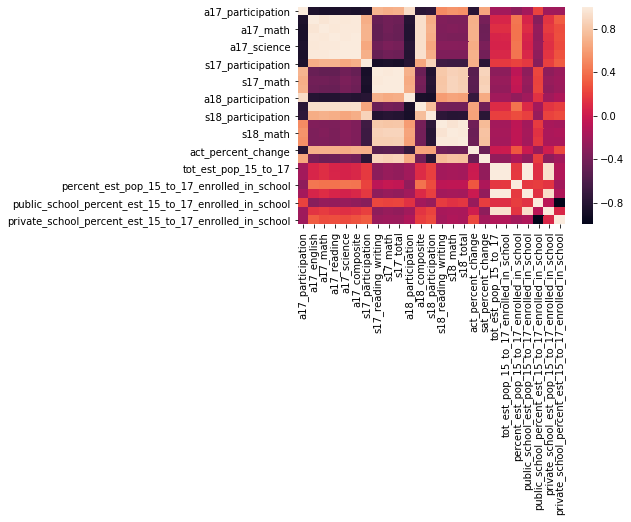

In [92]:
sns.heatmap(final.corr());

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [93]:
#Inserted a ")" in line two
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))  
    fig, ax = plt.subplots(nrows=nrows, ncols=2)  
    ax = ax.ravel()  
    for i, column in enumerate(list_of_columns):  
        ax[i].hist(dataframe[column])  
plt.show()


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

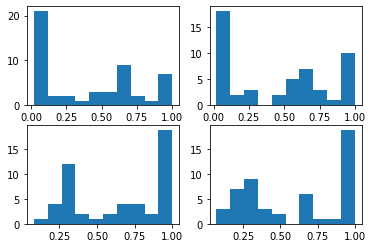

In [94]:
subplot_histograms(final, 
                   ['s17_participation','s18_participation', 'a17_participation', 'a18_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'],
                   ['Participation Percentage','Participation Percentage', 'Participation Percentage', 'Participation Percentage'],
                  #title('SAT and ACT participation and total scores')
                  )

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


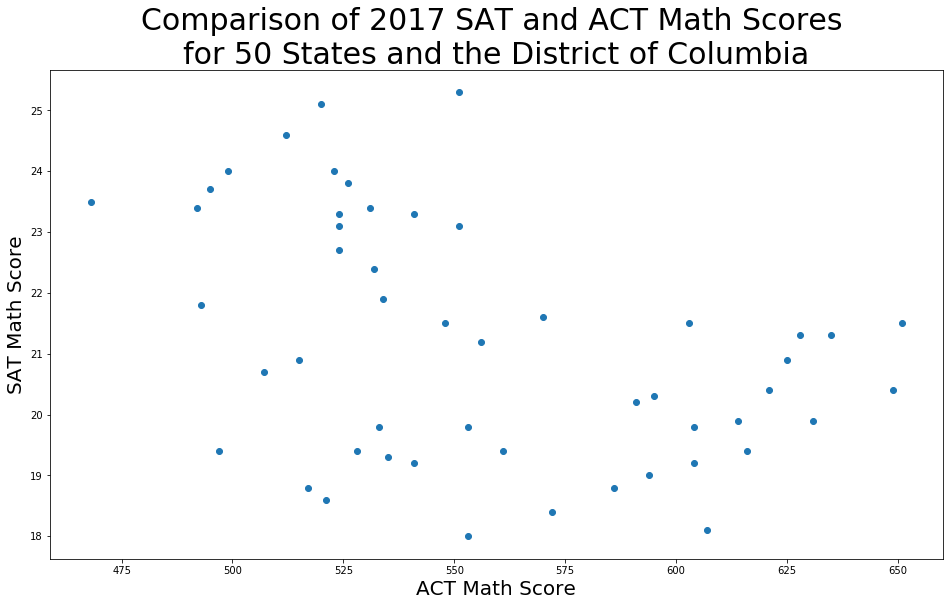

In [95]:
plt.figure(figsize=(16, 9))
plt.scatter(final['s17_math'],
            final['a17_math']);
plt.title("Comparison of 2017 SAT and ACT Math Scores \nfor 50 States and the District of Columbia", fontsize = 30)
plt.ylabel("SAT Math Score", rotation = 90, fontsize = 20)
plt.xlabel("ACT Math Score", fontsize = 20);

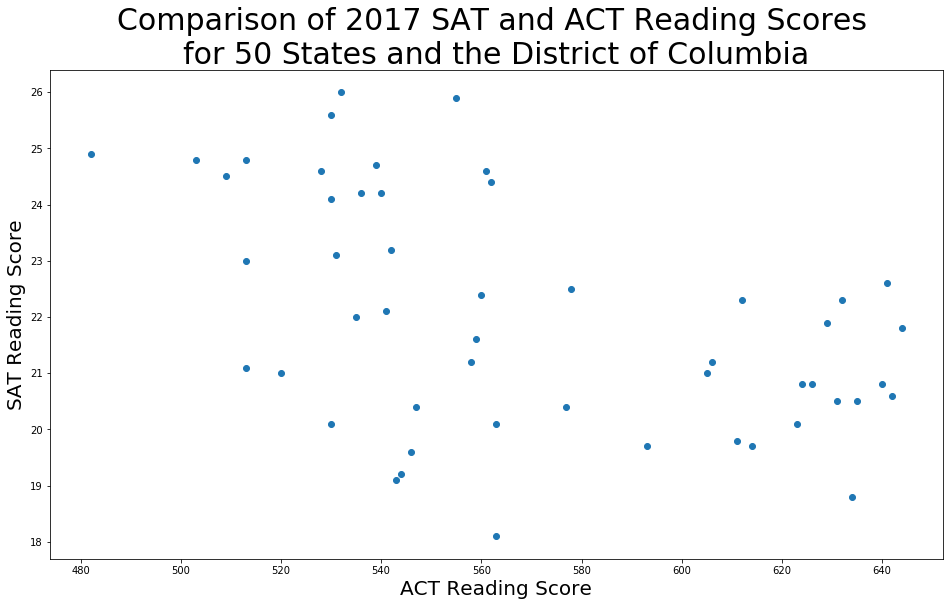

In [96]:
plt.figure(figsize=(16, 9))
plt.scatter(final['s17_reading_writing'],
            final['a17_reading']);
plt.title("Comparison of 2017 SAT and ACT Reading Scores \nfor 50 States and the District of Columbia", fontsize = 30)
plt.ylabel("SAT Reading Score", rotation = 90, fontsize = 20)
plt.xlabel("ACT Reading Score", fontsize = 20);

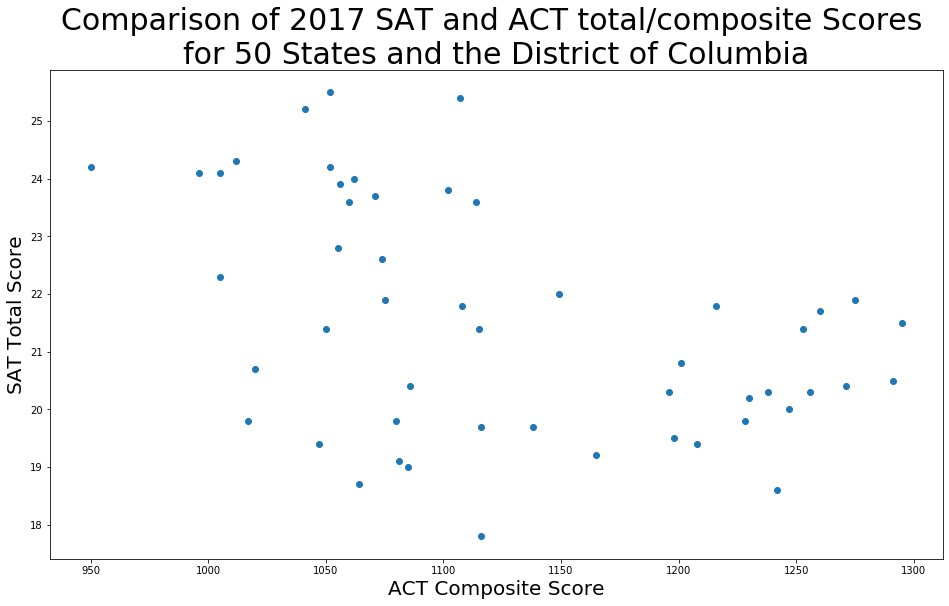

In [97]:
plt.figure(figsize=(16, 9))
plt.scatter(final['s17_total'],
            final['a17_composite']);
plt.title("Comparison of 2017 SAT and ACT total/composite Scores \nfor 50 States and the District of Columbia", fontsize = 30)
plt.ylabel("SAT Total Score", rotation = 90, fontsize = 20)
plt.xlabel("ACT Composite Score", fontsize = 20);

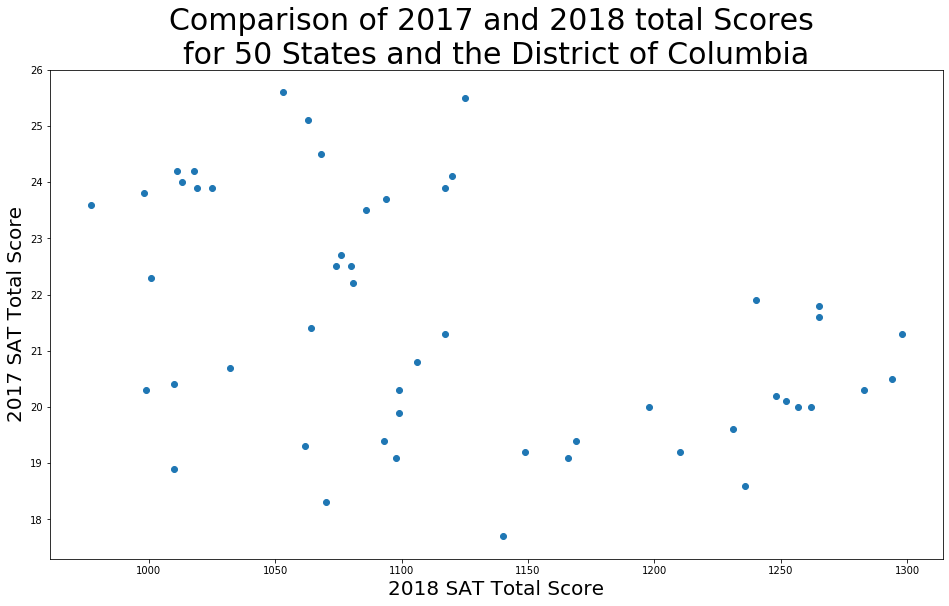

In [98]:
plt.figure(figsize=(16, 9))
plt.scatter(final['s18_total'],
            final['a18_composite']);
plt.title("Comparison of 2017 and 2018 total Scores \nfor 50 States and the District of Columbia", fontsize = 30)
plt.ylabel("2017 SAT Total Score", rotation = 90, fontsize = 20)
plt.xlabel("2018 SAT Total Score", fontsize = 20);

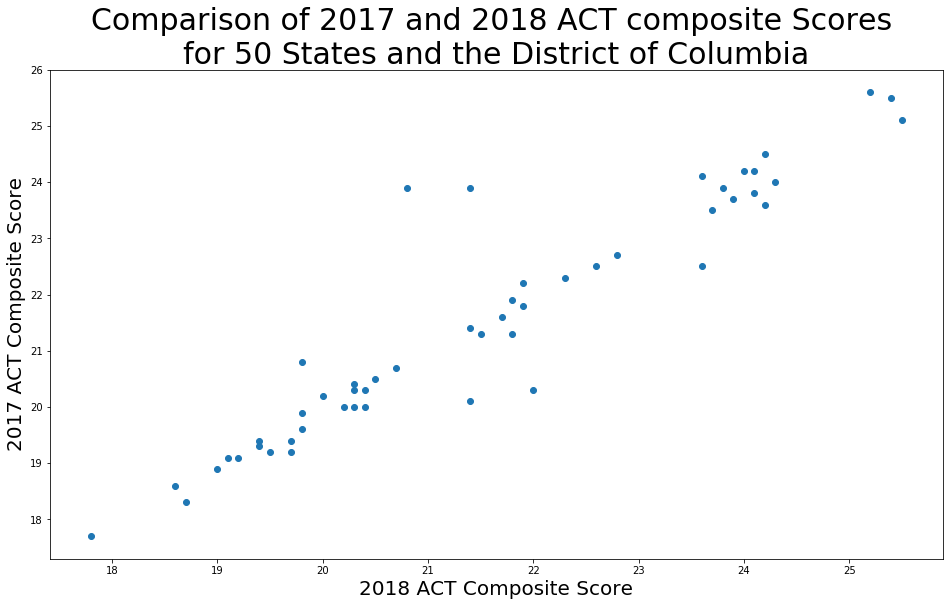

In [99]:
plt.figure(figsize=(16, 9))
plt.scatter(final['a17_composite'],
            final['a18_composite']);
plt.title("Comparison of 2017 and 2018 ACT composite Scores \nfor 50 States and the District of Columbia", fontsize = 30)
plt.ylabel("2017 ACT Composite Score", rotation = 90, fontsize = 20)
plt.xlabel("2018 ACT Composite Score", fontsize = 20);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

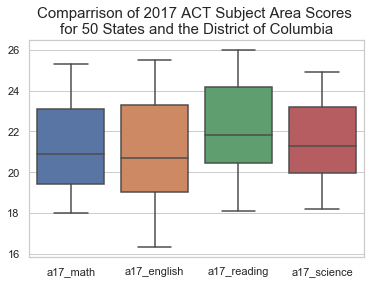

In [100]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(data = final[['a17_math', 'a17_english', 'a17_reading', 'a17_science']])
plt.title("Comparrison of 2017 ACT Subject Area Scores \nfor 50 States and the District of Columbia", fontsize = 15);

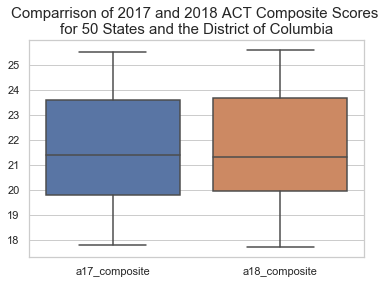

In [101]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(data = final[['a17_composite', 'a18_composite']])
plt.title("Comparrison of 2017 and 2018 ACT Composite Scores \nfor 50 States and the District of Columbia", fontsize = 15);

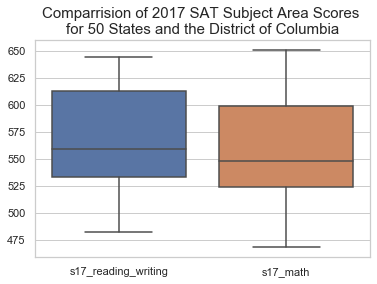

In [102]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(data = final[['s17_reading_writing', 's17_math']])
plt.title("Comparrision of 2017 SAT Subject Area Scores \nfor 50 States and the District of Columbia", fontsize = 15);

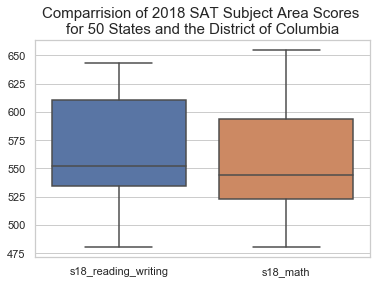

In [103]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(data = final[['s18_reading_writing', 's18_math']])
plt.title("Comparrision of 2018 SAT Subject Area Scores \nfor 50 States and the District of Columbia", fontsize = 15);

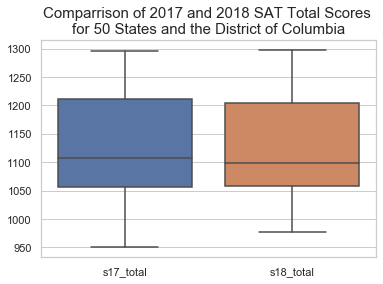

In [104]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(data = final[['s17_total', 's18_total']])
plt.title("Comparrison of 2017 and 2018 SAT Total Scores \nfor 50 States and the District of Columbia", fontsize = 15);

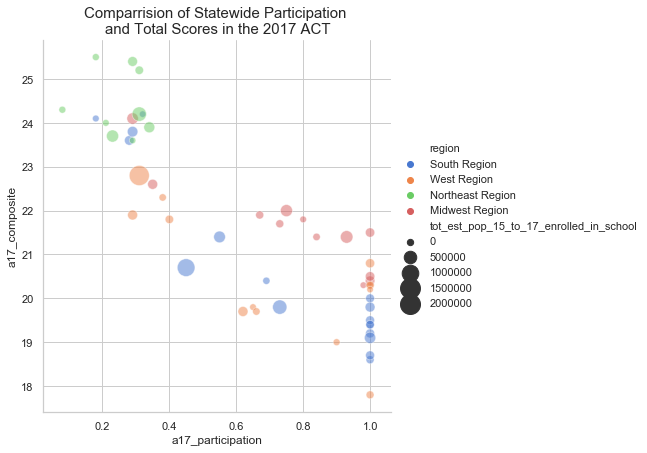

In [105]:
ax1 = sns.relplot(x='a17_participation', y='a17_composite', hue="region", size="tot_est_pop_15_to_17_enrolled_in_school",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=final);
plt.title('Comparrision of Statewide Participation \nand Total Scores in the 2017 ACT', size =15);

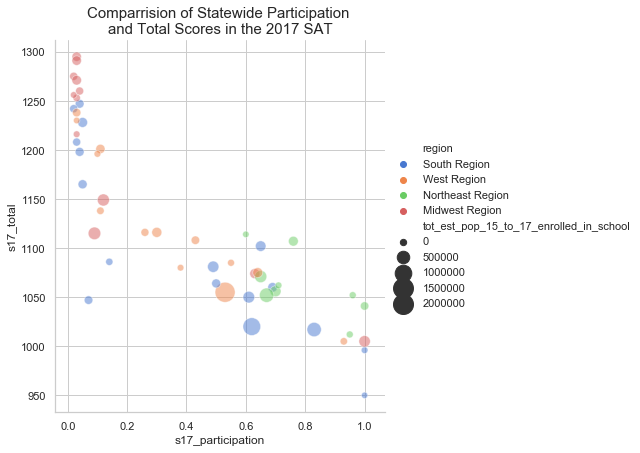

In [106]:
ax2 = sns.relplot(x='s17_participation', y='s17_total', hue="region", size="tot_est_pop_15_to_17_enrolled_in_school",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=final)
plt.title('Comparrision of Statewide Participation \nand Total Scores in the 2017 SAT', size =15);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

> **Answers:**
>
>Participation:  This variable has a mean of .65 but a kurtosis of -1.59 as it has many outliers that prevent a single central peak. The variable also has a negative skewness as many states have 100% participation in the ACT.  The actual value of the skewness -0.19.  While the mean is somewhat centralized, this is because of a wide distribution across the sample. The actual minimum value of this variable is 0.08 meaning that although there are states with low participation, all states have some degree of participation .    
>
>English:  This variable has minimum of 16.3 and maximum of 25.5.  The skewness of the variable at 0.34 means that the mode value (if one exists) lie to the left of the mean.  Like the mean value of 20.93, the standard deviation of 2.35 is sensitive to very high or low values.  This is because the standard deviation is based on the distance from the mean. 
>
>Math:  This variable has a range of 7.3, which represents the difference between the minimum and maximum values.  The median value of 20.9 is lower than the mean value of 21.18 which indicates a positive skew.  Indeed, the skew of 0.32 shows quantitatively that there is a “longer tail” to the right side of the graph.  This was then confirmed by applying a histogram to the variable.  
>
>Reading: Like the 2017 ACT English variable, this variable has one of the higher standard deviation values of the dataset.  The standard deviation of 2.06 indicates that the values within this variable are spread out across its range.  The skewness is a positive 0.26 indicating the “peak” to of the histogram lay to left of the median value.  The negative kurtosis of -1.00 is also similar to that of the math score indicating that both variables have a “flatter” distribution than a curve with similar mean and standard deviations. 
>
>Science:  Science has a median value of 21.30 and a mean value of 21.46.  While these values are both measures of central tendency, the mean is sensitive to outliers.  The median value on the other hand is the actual middle value (the 50th percentile).  The interquartile range (IQR) is the area that lay between the 25th and 75th percentile.  It is useful in predicting outliers and is where the majority of ones data may be found.  
>
>Composite: The composite 2017 ACT has a mean of 21.51.  It is higher than the mean values of science, english, and math, but lower than the 2017 ACT reading score.  If the composite score is the calculation of mean subject area scores this would explain the mean composite value. The composite score like other scores provided for the ACT is a floating point variable which means it may be difficult to get a mode value, even so three states have a composite score of exactly 19.8.  The dense cluster of peaks in the composite histogram signify that there may be other states who are also quite close to this value.   
>
>SAT 2017
>
>Participation:  The 2017 SAT had 17 states with a value of 1.0 (representing 100% participation).  As the value with the greatest occurrence in the variable this was also the mode value.  Such a strong shift to the right led to a kurtosis of -1.59 and a skew of -0.19.  The actual mean value was however only 65.25%.  This is because there is also a significant number of states with very low participation values. 
>
>Reading and Writing: The SAT differs from the ACT in several ways, including the scale of its  measurement.  Whereas the ACT uses a scale from 0-36, the SAT uses a scale from 200-800.  Even though the scale of the units is different, all of the same statistical tools may be used.  The distinction between units is important however, as standard deviation is measured in the same units as the variable itself.  Although the standard deviation of SAT reading and writing is 45.67 it is not necessarily 20 times larger than the standard deviation of the ACT 2017 reading standard deviation.  
>
>Math: The 2017 SAT math variable has a maximum value of 651 and a mean of 556.89.  Compared to the previous variable’s maximum of 644 and mean of 569.12 we can discern that some states scored much higher in math than other and that the majority of states scored much lower and may be grouped together.  This was supported by a histogram visualization of the 2017 SAT math variable.       
>
>Total:  The total of the 2017 SAT is the sum total of the two previous variables.  As such a normalization is necessary to compare this value to either of the previous two variables.  The positive skewness of the SAT total identifies a “fat” left tail with a greater density of values.  Its kurtosis of -1.12 indicates that its tails are heavy, the distribution is broad, and the peak is broader and wider than if it was a normal curve.  
>
>ACT 2018
>
>Participation: Like the 2017 ACT participation variable, the 2018 participation variable has a high degree of skewness caused by many states with a 100% participation rate.  Although one may expect the mode of 17 states with complete participation have shifted the mean value to a level higher than the median value, this is not the case.  The median value of 66% remains higher due to a dense cluster of states with a participation rate close to 30%.  The actual mean value is 61.73%.  This variable is a great example of how visualizations may become misleading tools when not supplemented by descriptive statistics.    
>
>Composite:  The 2018 ACT composite score of 21.49 is nearly identical to the 2017 score of 21.51.  Even though the mean values and standard deviations of each are similar, this does not mean that there is no significant difference between the two variables!  Calculating significant difference is another statistical test entirely. The small standard deviation here means that the values are close to the mean of the data set.  The interquartile range of the composite score is from 19.95 to 23.65 with the median value falling at 21.3.  The similarities of the mean and median values show that there is little effect from outliers on the mean and that the variable is well balanced.  Even so, there is not a distinct standard normal curve in the variable as the kurtosis remains at -1.12. 
>
>SAT 2018
>
>Participation:   Like similar variables in the data frame this participation variable has density at the far ends of the variable.  This results in a mean of 45.75% and a median of .52.  The high number of states with little participation lead to the mean being pulled lower than the “true middle” number of the variable.  
>
>Reading and Writing:  The 2018 reading and writing SAT variable has a kurtosis of -1.07 and skew of 0.23.  The minimum and maximum values are 480 and 643 which is similar to that of the 2017 variable for reading and writing.  The overall range is 163.  
>
>Math The positive skew of the math variable indicates that there is a fatter tail to the left side of the histogram.  The variable is moderately skewed but less so than other variables.  The mean value being higher than the median is indicative of dense higher values.
>
>Total: The maximum value of this variable is close to that of its 2017 counterpart, but the lower 75% means that the majority of variables did not score as highly in 2018.  The trend of scores centralizing around the median value is also presented by the minimum value increasing while the 25th percentile stayed very similar to that of 2017. 
>








#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

>The central limit theorm tells us that as more data is introduced we are more likely to see distributions that are less affected by extremes.  The results of the sample are however influenced by the charateristics of the population it is drawn from.  In our case the population is only students who have taken either the SAT or ACT.  Although we may use tools like statistical tests to describe the data, there are limitations to what we may extrapolate from it.  

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

>The SAT math and reading variables may not be compared to the participation variables as they are not represntative of the same information.  Particiaption rates are percentages while the subject areas are presented in units of points for the tests. As such participation is never evenly distributed.  Each math and reading score has its own distictive distribution, however most tend to have some centralized distribution.  

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

>There are limitations to the data provided that limits the amount of rational testing available. For example, if two states are similar in population and particiaption percentage then trends may be compared among those states.  Comparrisons bewteen the datasets are more complicated.  The tests have a different number of sections and the presence of a science test in the ACT and not the SAT means that the composite score/total score may also not provide a 1:1 comparrision.  Even percent change is complicated by having only two years of data available.  Even so the data may provide a snapshot of the specific years and information available. One should be cautious though in comparing states as some states may have equally large participation, but vastly different demographics that are not presented by the data.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

>Yes and no.  Although both tests may be used to assess a students comprehension of critical math skills, the tests do so in different ways.  The SAT asks 58 questions in 80 minutes and allows students to use a calculator for about half of the math questions.  The SAT provides a section that does not allow the use of a calculator and a section that does allow the use of a calculator.  This may functions as a way to test students ability to use tools as well as offer an avenue to focus less on arithmetic and more on mathematical processes. Longer questions may test a students ability to identify key information The ability to read charts and graphs is tested in the SAT, but not the ACT.  The ACT asks students 60 questions in 60 minutes without the use of a calculator.  It asks questions on data collection and allows a calculator throughout the entire math section.  Like the ACT it tests geometry, but focuses more on the application and use of formulas to calculate volumes.  The ACT also provides no reference sheet for students taking the test which means there is a greater emphasis on rote memory.    
>
>Unfortunately data provided on test scores was provided in aggregate.  Without a finer level of information one may not be able to rationally determine how these math scores relate to one another.  Anonymized random samples of student data may reveal a relationship between SAT and ACT scores, however this would require students to take both exams and for test administrators to be willing to provide that data.  Ultimately one may be better off comparing each test only to itself.     

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

>Illinois and Colorado:  These states saw the greatest percent increase from 2017 to 2018.  They also saw the greatest percent decrease in ACT participation.  These changes in participation may linked as one test infiltrates the market and competes for students limited test preparation time.    
>
>Washington DC:  In 2017, DC had a 100% SAT participation rate.  In 2018, it had a 91% participation rate.  As DC has a very small population of students ages 15-17 changes in participation are likely to appear more quickly than in larger states like California, New York, and Texas.  
>
>Nationally, there is a negative trend in the SAT data whereby states with higher levels of participation have lower total scores.  Although the p-value is less than 0.0001 the r-squared is only 0.6.  This low r-squared value indicates that there are many other linkages between the two variables that have not been tested by this bivariate model.  Also, over the last five years there have been a number of changes to the scoring of both the SAT and ACT.  While we would like to believe that all people are rational decision makers and that there is clear reason for students to take one exam over the other, bounded rationality may lead some students, parents, and admissions officers to unconsciously favor one test.  For students, a limited amount of time to prepare for either exam means that they may choose to take the exam they are most comfortable or familiar with. Parents, on the other hand may have limited information on either test and feel pressure to support their children with either decision.  Finally, admissions counselors and teachers may have their own unconscious bias based on past experiences with the exam administrators or work in education.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

>In spite of negative press, and misleading rhetoric linking higher statewide SAT participation with lower statewide SAT scores, participation in the SAT increased nationally from 2017-2018. In order to continue this growth, I propose that the College Board strengthen existing relationships while advancing into new markets, so that national participation in the SAT does not fall behind that of its rival the ACT.
>
>These recommendations are supported by the growth of SAT participation in Illinois and Colorado.  These states saw a sharp rise in SAT participation along with a decline in ACT participation.  In other parts of the United States SAT participation remained mostly the same, with only a small decrease in most declining states.  
>
>Participation percentage alone is not enough to determine the growth of the SAT.  Full participation in very large states may be more valuable than full participation in several small states, but this does not mean that the College Board should write off smaller states.  In places like Washington DC there may be an induced effect from market saturation.  SAT participation in 2017 was at 100% in Washington DC but only 91% in 2018.  Immediate action to reverse this decline may help to sustain the momentum the College Board is building in other parts of the country.    
>
>Broadly speaking, the SAT appears to have fairly constant growth across the United States with deep market penetration in some places, while the ACT has full participation in a greater number of states but less growth overall.  This stagnation in ACT momentum may be leveraged as ACT Inc becomes complacent.  My recommendations are that the College Board continue to develop a mindset for growth and publicize the participation of states like Illinois and Colorado, while investing new resources into Washington DC and similar states.